In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [3]:
df # Price is the dependent Variable and remaining are Independent Variables

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.shape

(1436, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


In [8]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [12]:
df.reset_index()

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df=pd.get_dummies(data=df,columns=['Fuel_Type'])
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,False,True


In [15]:
df =df.astype(int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1435 non-null   int64
 1   Age_08_04         1435 non-null   int64
 2   KM                1435 non-null   int64
 3   HP                1435 non-null   int64
 4   Automatic         1435 non-null   int64
 5   cc                1435 non-null   int64
 6   Doors             1435 non-null   int64
 7   Cylinders         1435 non-null   int64
 8   Gears             1435 non-null   int64
 9   Weight            1435 non-null   int64
 10  Fuel_Type_CNG     1435 non-null   int64
 11  Fuel_Type_Diesel  1435 non-null   int64
 12  Fuel_Type_Petrol  1435 non-null   int64
dtypes: int64(13)
memory usage: 157.0 KB


In [32]:
sns.pairplot(df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

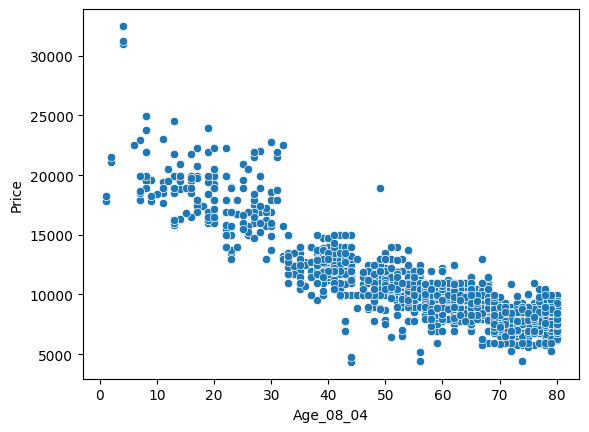

In [25]:
sns.scatterplot(x=df['Age_08_04'],y=df['Price'])

<Figure size 5000x2000 with 0 Axes>

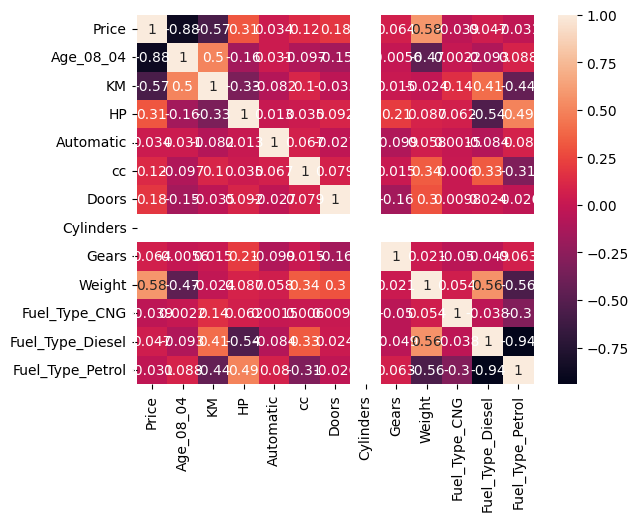

<Figure size 5000x2000 with 0 Axes>

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(50,20))

In [36]:
model=smf.ols("Price~Age_08_04+cc+KM+HP+Automatic+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol",data=df).fit()

In [37]:
model.pvalues

,0
Intercept,2.078738e-09
Age_08_04,1.024567e-292
cc,5.718755e-01
KM,5.848015e-37
HP,9.494286e-11
Automatic,5.967263e-02
Doors,4.648374e-01
Cylinders,2.078738e-09
Gears,1.561888e-03
Weight,4.221810e-59


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [48]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


In [49]:
data = df.drop(columns=['Price'])
data

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [50]:
vif = pd.DataFrame()
vif

""


In [51]:
vif['Features'] = data.columns
vif

,Features
0,Age_08_04
1,KM
2,HP
3,Automatic
4,cc
5,Doors
6,Cylinders
7,Gears
8,Weight
9,Fuel_Type_CNG


In [52]:
range(len(data.columns))

range(0, 12)

In [55]:
data.values

array([[   23, 46986,    90, ...,     0,     1,     0],
       [   23, 72937,    90, ...,     0,     1,     0],
       [   24, 41711,    90, ...,     0,     1,     0],
       ...,
       [   71, 17016,    86, ...,     0,     0,     1],
       [   70, 16916,    86, ...,     0,     0,     1],
       [   76,     1,   110, ...,     0,     0,     1]])

In [57]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[np.float64(1.9119519389147475),
 np.float64(2.002649407883752),
 np.float64(2.300692139852943),
 np.float64(1.094618711359),
 np.float64(1.2236058256151434),
 np.float64(1.2170720206341916),
 np.float64(0.0),
 np.float64(1.117553987278675),
 np.float64(3.254341823279579),
 np.float64(inf),
 np.float64(inf),
 np.float64(inf)]

In [58]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [59]:
vif

,Features,VIF
0,Age_08_04,1.911952
1,KM,2.002649
2,HP,2.300692
3,Automatic,1.094619
4,cc,1.223606
5,Doors,1.217072
6,Cylinders,0.000000
7,Gears,1.117554
8,Weight,3.254342
9,Fuel_Type_CNG,inf
